# Overview
The occurance of a safety car during a race has great implications on strategic planning and decision making. Therefore, it is useful to view the historical trends of races at the same circuit in previous years to help develop the strategic plan going into a race weekend.  

Data from previous grand prix (Since 2018 - new regulations + halo) at the circuit will be used to train the model. The model will then be evaluated against 2021's race in order to observe capabilities.

The method I'll be using is plotting the probability denisty curves (kernel density) of when yellow flag, safety car, and virtual safety car laps took place in previous Bahrain Grand Prixs. Identifying any significant trends or patterns can help put the drivers in a better position to score points given lower starting position or pace. 

In [3]:
import fastf1 as ff1
import pandas as pd
from fastf1 import plotting
from matplotlib import pyplot as plt
import os

In [7]:
# use fast-f1 to get bahrain race sessions since 2018
bahrain_21 = ff1.get_session(2018, 'Bahrain', 'R')
bahrain_21 = bahrain_21.load_laps()
bahrain_21 = pd.DataFrame(data = bahrain_21)
bahrain_21.to_csv('bahrain_18_race.csv')

# dataframes merged using sqlite

NameError: name 'ff1' is not defined

In [15]:
# load csv
race = pd.read_csv('bahrain_track_status_history.csv')
race.head()
# create dataframes with each output variable (yellow flag, safety car deployed)
yellow_flag = race[["LapNumber","yellow_flag"]]
safety_car = race[["LapNumber","safety_car"]]
vsc = race[["LapNumber","vsc_deployed"]]

I have isolated each of the track codes denoted by the Fast-F1 package to plot the probability curves of each outcome.

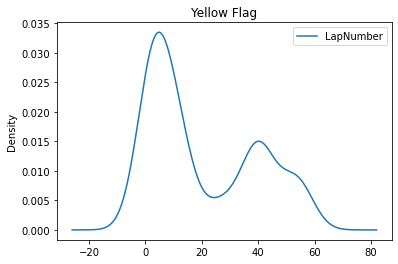

In [20]:
# create probability density curves for laps with 'yes' in each category

# yellow flag
yellow_flag = yellow_flag[yellow_flag["yellow_flag"] == "yes"]

yf = yellow_flag.plot.kde(title = 'Yellow Flag', xlabel = 'Lap')

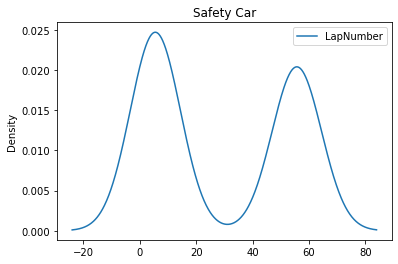

In [6]:
# safety car
safety_car = safety_car[safety_car["safety_car"] == "yes"]

sc = safety_car.plot.kde(title = 'Safety Car')

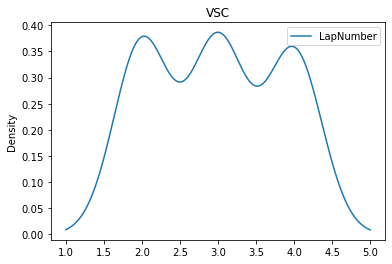

In [17]:
# yellow flag
vsc = vsc[vsc["vsc_deployed"] == "yes"]

vscp = vsc.plot.kde(title = 'VSC')

In [21]:
# to ensure that VSCs did not come out beyond Lap 5
vsc.describe()

,LapNumber
count,56.000000
mean,2.982143
std,0.820002
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


Based on the curves above, it appears that incidents are highly likely in the beginning stages of the race. 

In [22]:
# using this year's race to validate results
race2 = pd.read_csv('bahrain_track_status_21.csv')
race2.head()

,LapNumber,clear_track,yellow_flag,safety_car,vsc_deployed,vsc_ending
0,1.0,no,yes,yes,no,no
1,2.0,no,no,yes,no,no
2,3.0,no,no,yes,no,no
3,4.0,no,yes,no,yes,no
4,5.0,no,no,no,yes,yes


In [13]:
yellow_flag_21 = race2[["LapNumber","yellow_flag"]]
safety_car_21 = race2[["LapNumber","safety_car"]]
vsc_21 = race2[["LapNumber","vsc_deployed"]]

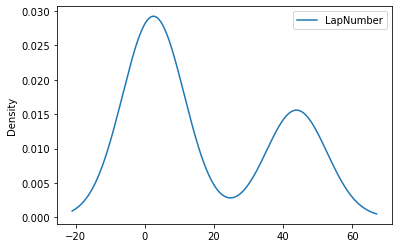

In [14]:
# yellow flag
yellow_flag_21 = yellow_flag_21[yellow_flag_21["yellow_flag"] == "yes"]

yf21 = yellow_flag_21.plot.kde()

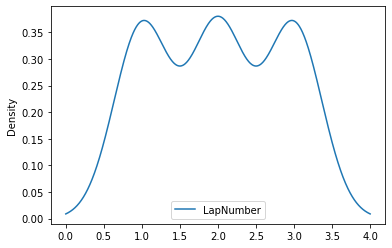

In [33]:
# safety car
safety_car_21 = safety_car_21[safety_car_21["safety_car"] == "yes"]

sc21 = safety_car_21.plot.kde()

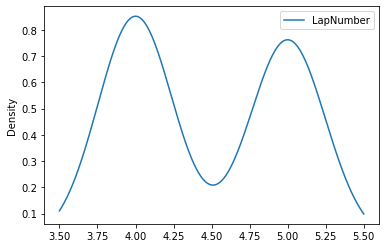

In [34]:
# yellow flag
vsc_21 = vsc_21[vsc_21["vsc_deployed"] == "yes"]

vscp_21 = vsc_21.plot.kde()